

# 1. Analyzing cardiovascular disease data


In this assignment, we will answer questions about a dataset on cardiovascular disease. You do not need to download the data: it is downloaded from the repository.

## 1.1. Problem

Predict the presence or absence of cardiovascular disease (CVD) using the patient examination results.

## 1.2. Data description

There are 3 types of input features:

- *Objective*: factual information;
- *Examination*: results of medical examination;
- *Subjective*: information given by the patient.

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

Let's get to know our data by performing a preliminary data analysis.

#  2. Part 1. Preliminary data analysis

First, we will initialize the environment:

In [1]:
# Import all required modules
# Disabling warnings
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

# Import plotting modules and set up
import seaborn as sns

sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

We should use the `seaborn` library for visual analysis, so let's set that up too:

In [2]:
# Setting up visual settings for figures in `seaborn`
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (11, 8), "axes.titlesize": 18}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 11, 8

To make it simple, we will work only with the training part of the dataset:

In [3]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [4]:
df = pd.read_csv(DATA_PATH + "mlbootcamp5_train.csv", sep=";")
print("Dataset size: ", df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


It would be instructive to peek into the values of our variables.

Let's convert the data into *long* format and depict the value counts of the categorical features using [`factorplot()`](https://seaborn.pydata.org/generated/seaborn.factorplot.html).

In [5]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

# sns.catplot(
#     x="variable", y="count", hue="value", data=df_uniques, kind="bar"
# )
print(df_uniques)

       variable  value  count
0        active      0  13739
1        active      1  56261
2          alco      0  66236
3          alco      1   3764
4        cardio      0  35021
5        cardio      1  34979
6   cholesterol      1  52385
7   cholesterol      2   9549
8   cholesterol      3   8066
9        gender      1  45530
10       gender      2  24470
11         gluc      1  59479
12         gluc      2   5190
13         gluc      3   5331
14        smoke      0  63831
15        smoke      1   6169


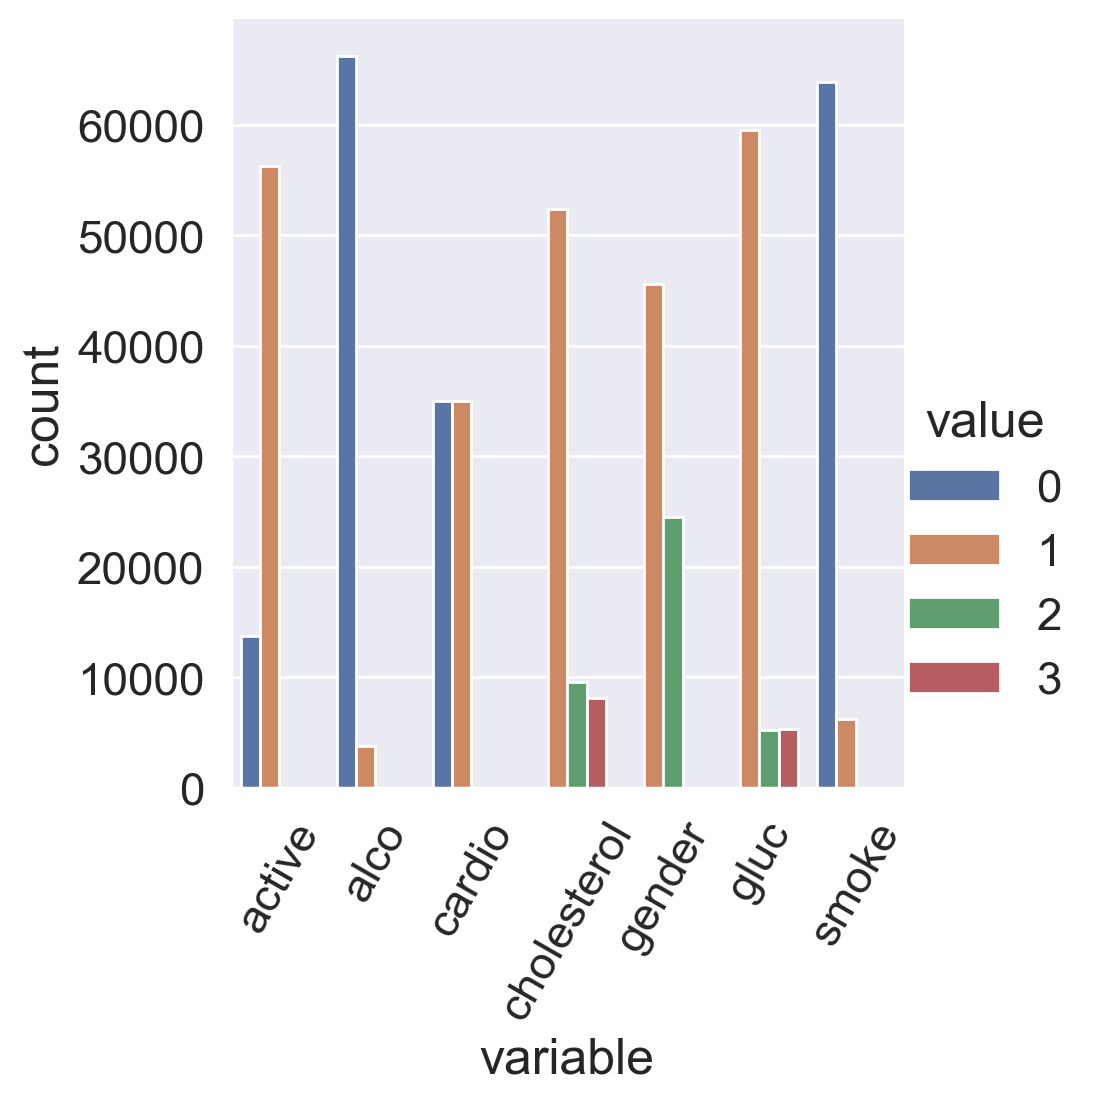

In [6]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable", y="count", hue="value", data=df_uniques, kind="bar"
).set_xticklabels(rotation = 60)

We can see that the target classes are balanced. That's great!

Let's split the dataset by target values. Sometimes we can immediately identify the most significant feature by just looking at the plot?

In [7]:
print(df)
print('---------------- \n')

df_uniques = pd.melt(
    frame=df,
    value_vars=['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active'],
    id_vars=['cardio'],
)
print(df_uniques)
print('---------------- \n')

df_uniques = (
    pd.DataFrame(df_uniques.groupby(['variable', 'value', 'cardio'])['value'].count())
    .sort_index(level=[0, 1])
    .rename(columns={'value': 'count'})
    .reset_index()
)
print(df_uniques)

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0 

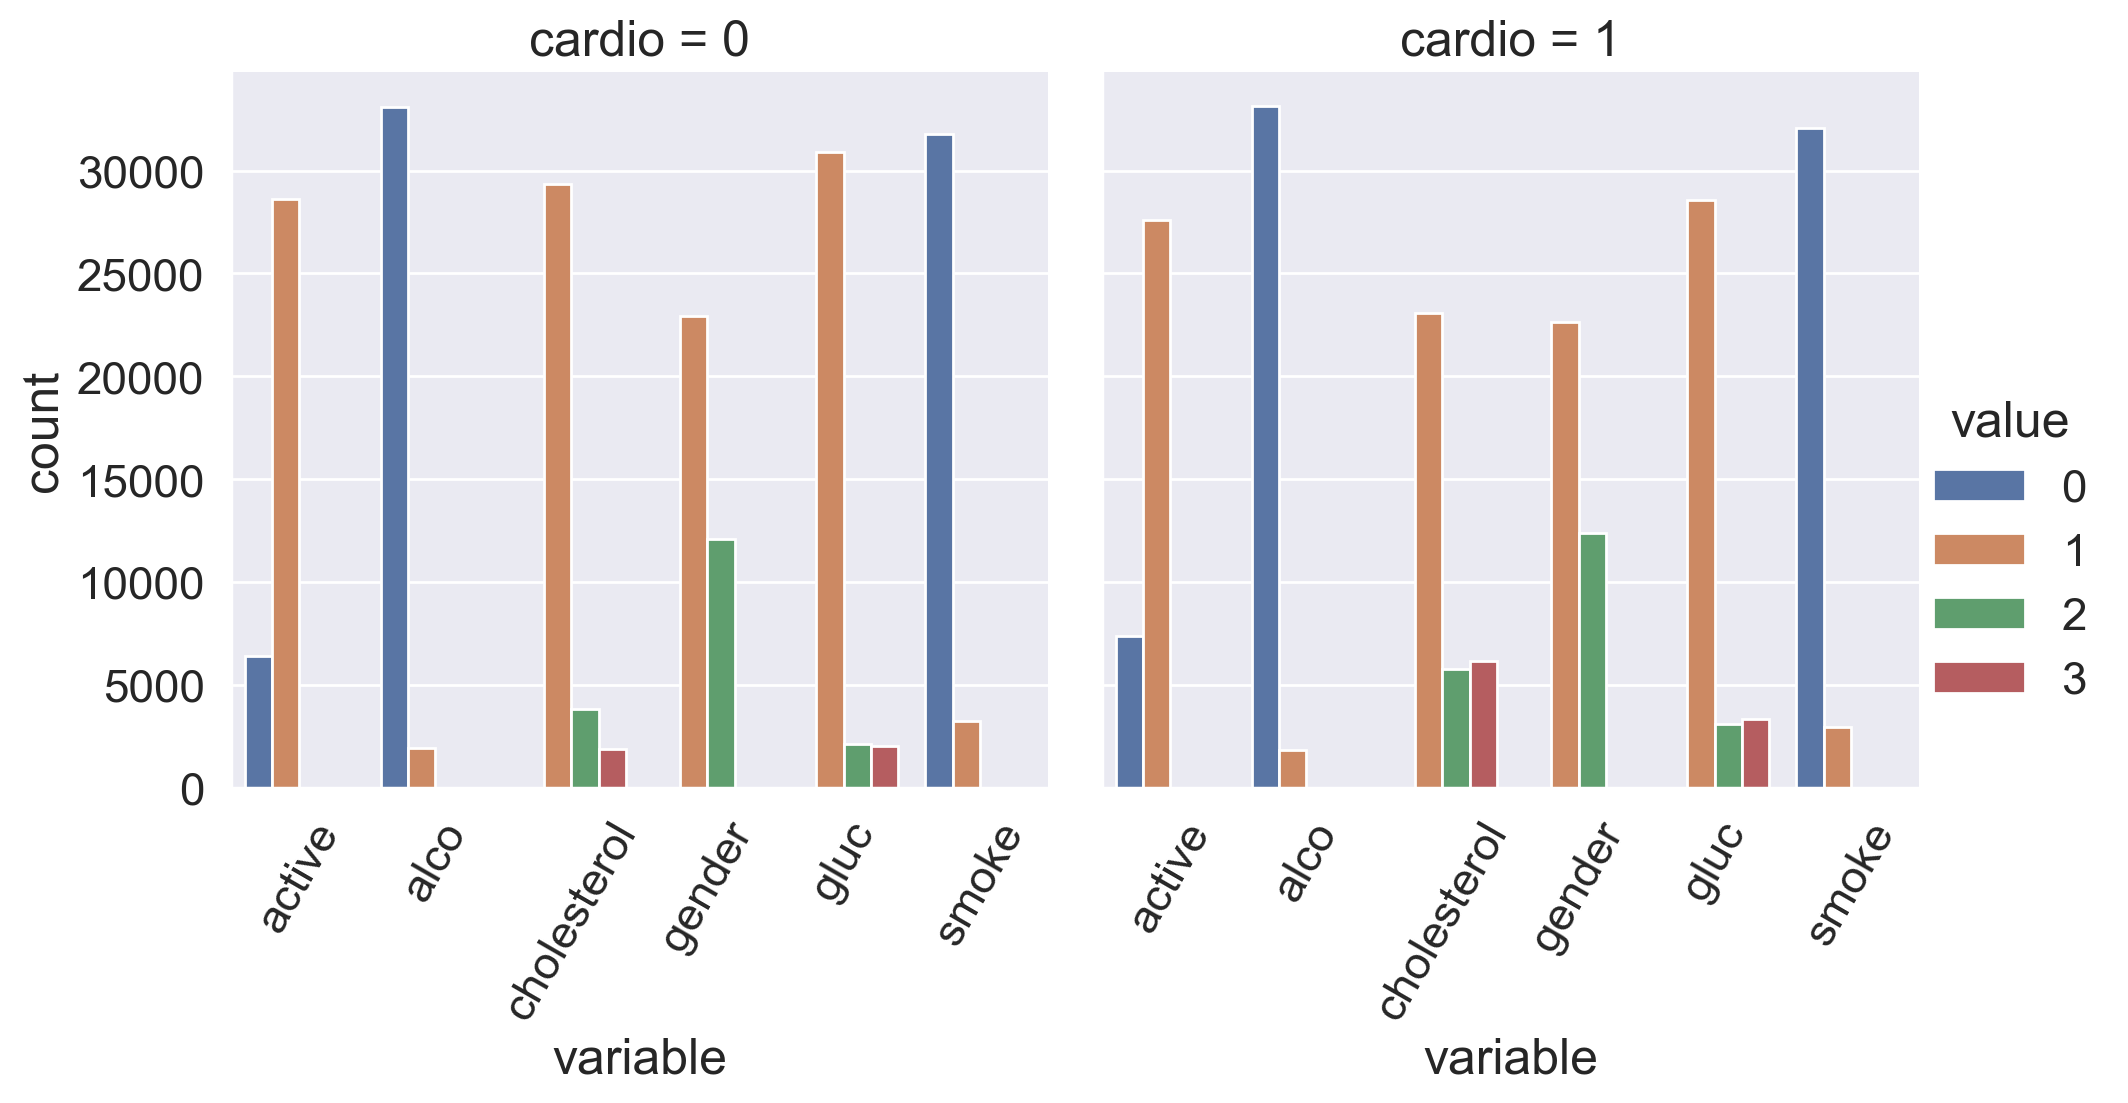

In [8]:
df_uniques = pd.melt(
    frame=df,
    value_vars=['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active'],
    id_vars=["cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(['variable', 'value', 'cardio'])['value'].count())
    .sort_index(level=[0, 1])
    .rename(columns={'value': 'count'})
    .reset_index()
)

sns.catplot(
    x='variable',
    y='count',
    hue='value',
    col='cardio',
    data=df_uniques,
    kind='bar',
).set_xticklabels(rotation = 60)

We can see that the distribution of cholesterol and glucose levels great differs by the value of the target variable. Is this a coincidence?

Now, let's calculate some statistics for the feature unique values:

In [9]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * "-")

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


In the end, we have:
- 5 numerical features (excluding *id*);
- 7 categorical features;
- 70000 records in total.

## 2.1. Basic observations

**Question:** How many men and women are present in this dataset? Values of the `gender` feature were not given (whether "1" stands for women or for men) – let's find out by looking analyzing height, making the assumption that men are taller on average.


In [10]:
a = df['gender'].value_counts()
b = df.groupby('gender')['height'].mean()

print(b.max())
print('----')


print(a)
print('----')
print(b)
print('----')


result = pd.concat([b, a], axis=1, join="inner")

result.head()

169.94789538210054
----
1    45530
2    24470
Name: gender, dtype: int64
----
gender
1    161.355612
2    169.947895
Name: height, dtype: float64
----


,height,gender
1,161.355612,45530
2,169.947895,24470


161 см и почти 170 см в среднем, поэтому мы делаем вывод, что gender = 1 представляет женщин, а gender = 2 – мужчин. Таким образом, выборка содержит 45530 женщин и 24470 мужчин.

**Question:** Who more often report consuming alcohol – men or women?

In [11]:
df.groupby('gender')['alco'].mean()

gender
1    0.025500
2    0.106375
Name: alco, dtype: float64

Мужчины

**Question:** What's the rounded difference between the percentages of smokers among men and women?

In [12]:
df.groupby('gender')['smoke'].mean()

gender
1    0.017856
2    0.218880
Name: smoke, dtype: float64

In [13]:
round(100 * (df.loc[df['gender'] == 2, 'smoke'].mean() -
             df.loc[df['gender'] == 1, 'smoke'].mean()))

20

**Question:** What's the rounded difference between median values of age (in months) for non-smokers and smokers? You'll need to figure out the units of feature `age` in this dataset.

In [14]:
df.groupby('smoke')['age'].median() / 365.25

smoke
0    53.995893
1    52.361396
Name: age, dtype: float64

In [15]:
round((
    df[df['smoke'] == 0]['age'].median() - df[df['smoke'] == 1]['age'].median()
) / 365.25 * 12)

20

## 2.2. Risk maps
**Task:**

On the website for the European Society of Cardiology, a [SCORE scale](https://www.escardio.org/Education/Practice-Tools/CVD-prevention-toolbox/SCORE-Risk-Charts) is provided. It is used for calculating the risk of death from a cardiovascular decease in the next 10 years. Here it is:

![image](img/SCORE_CVD_eng.png)


Let's take a look at the upper-right rectangle, which shows a subset of smoking men aged from 60 to 65. (It's not obvious, but the values in the figure represent the upper bound).

We see the value 9 in the lower-left corner of the rectangle and 47 in the upper-right. This means that, for people in this gender-age group whose systolic pressure is less than 120, the risk of a CVD is estimated to be 5 times lower than for those with the pressure in the interval [160,180).

Let's calculate that same ratio using our data.

Clarifications:
- Calculate ``age_years`` feature – round age to the nearest number of years. To complete this task, we will select people aged 60 to 64 years inclusive.
- Cholesterol level categories differ between the figure and our dataset. The conversion for the ``cholesterol`` feature is as follows: 4 mmol/l $\rightarrow$ 1, 5-7 mmol/l $\rightarrow$ 2, 8 mmol/l $\rightarrow$ 3.

**Question:** Calculate fractions of ill people (with CVD) in the two groups of people described in the task. What's the ratio of these two fractions?

In [16]:
df['age_years'] = (df['age'] / 365.25).round().astype('int')

In [17]:
df["age_years"].max()

65

The oldest people in the sample are aged 65. Let's select smoking men of age [60,64].

In [18]:
smoking_old_men = df[
    (df['gender'] == 2)
    & (df['age_years'] >= 60)
    & (df['age_years'] <= 64)
    & (df['smoke'] == 1)
]

In [19]:
low_old_risk = smoking_old_men[
    (smoking_old_men['cholesterol'] == 1)
    & (smoking_old_men['ap_hi'] < 120)
]['cardio'].mean()

print(low_old_risk)

0.2631578947368421


If cholesterol level in this age group is 1, and systolic pressure is below 120, then the proportion of people with  CVD is 26%.

In [20]:
hight_old_risk = smoking_old_men[
    (smoking_old_men['cholesterol'] == 3)
    & (smoking_old_men['ap_hi'] >= 160)
    & (smoking_old_men['ap_hi'] < 180)
]['cardio'].mean()

print(hight_old_risk)

0.8636363636363636


If, however, cholesterol level in this age group is 3, and systolic pressure is from 160 to 180, then the proportion of people with a CVD is 86%.

In [21]:
round(hight_old_risk / low_old_risk)

3

As a result, the difference is approximately 3-fold. Not 5-fold, as the SCORE scale tells us, but it's possible that the SCORE risk of CVD is nonlinearly dependent on the proportion of ill people in the given age group.



## 2.3. Analyzing BMI
**Task:**

Create a new feature – BMI ([Body Mass Index](https://en.wikipedia.org/wiki/Body_mass_index)). To do this, divide weight in kilograms by the square of the height in meters. Normal BMI values are said to be from 18.5 to 25.

**Question:** Choose the correct statements:

1. Median BMI in the sample is within boundaries of normal values.
2. Women's BMI is on average higher then men's.
3. Healthy people have higher median BMI than ill people.
4. In the segment of healthy and non-drinking men BMI is closer to the norm than in the segment of healthy and non-drinking women

In [22]:
df['BMI'] = df['weight'] / (df['height'] / 100) ** 2

In [23]:
df['BMI'].median()

26.374068120774975

First statement is incorrect since median BMI exceeds the norm of 25 points.

In [24]:
df.groupby('gender')['BMI'].median()

gender
1    26.709402
2    25.910684
Name: BMI, dtype: float64

Seconds statement is correct – women's BMI is higher on average.

Third statement is incorrect.

In [25]:
df.groupby('cardio')['BMI'].median()

cardio
0    25.476660
1    27.471384
Name: BMI, dtype: float64

In [26]:
# df_men = df[df['gender'] == 1]

# df_men.groupby(['alco', 'cardio'])['BMI'].median()

# df[df['gender'] == 1].groupby(['alco', 'cardio'])['BMI'].median()

df.groupby(['gender', 'alco', 'cardio'])['BMI'].median()



gender  alco  cardio
1       0     0         25.654372
              1         27.885187
        1     0         27.885187
              1         30.110991
2       0     0         25.102391
              1         26.674874
        1     0         25.351541
              1         27.530797
Name: BMI, dtype: float64

Comparing BMI values in rows where `alco=0` and `cardio=0`, we see that the last statement is correct.



## 2.4. Cleaning data

**Task:**
We can see that the data is not perfect. It contains "dirt" and inaccuracies. We'll see this better as we visualize the data.

Filter out the following patient segments (we consider these as erroneous data)

- diastolic pressure is higher than systolic
- height is strictly less than 2.5 percentile (Use `pd.Series.quantile` to compute this value. If you are not familiar with the function, please read the docs.)
- height is strictly more than 97.5 percentile
- weight is strictly less than 2.5 percentile
- weight is strictly more than 97.5 percentile

This is not everything that we can do to clean this data, but this is sufficient for now.

**Question:** What percent of the original data (rounded) did we filter out in the previous step?

In [27]:
df_to_remove = df[
    (df['ap_lo'] > df['ap_hi'])
    | (df['height'] < df['height'].quantile(0.025))
    | (df['height'] > df['height'].quantile(0.975))
    | (df['weight'] < df['weight'].quantile(0.025))
    | (df['weight'] > df['weight'].quantile(0.975))
]
print(round((df_to_remove.shape[0] / df.shape[0])*100))

filtered_df = df[~df.index.isin(df_to_remove)]

10


**Answer:** we have filtered out 10%



# 3. Part 2. Visual data analysis

## 3.1. Correlation matrix visualization

To understand the features better, we can create a matrix of the correlation coefficients between the features. From now on, we use the filtered data set..

**Task:**

Plot a correlation matrix using `heatmap()`.

**Question:** Which pair of features has the strongest Pearson's correlation with the *gender* feature?

1. Cardio, Cholesterol
2. Height, Smoke
3. Smoke, Alco
4. Height, Weight

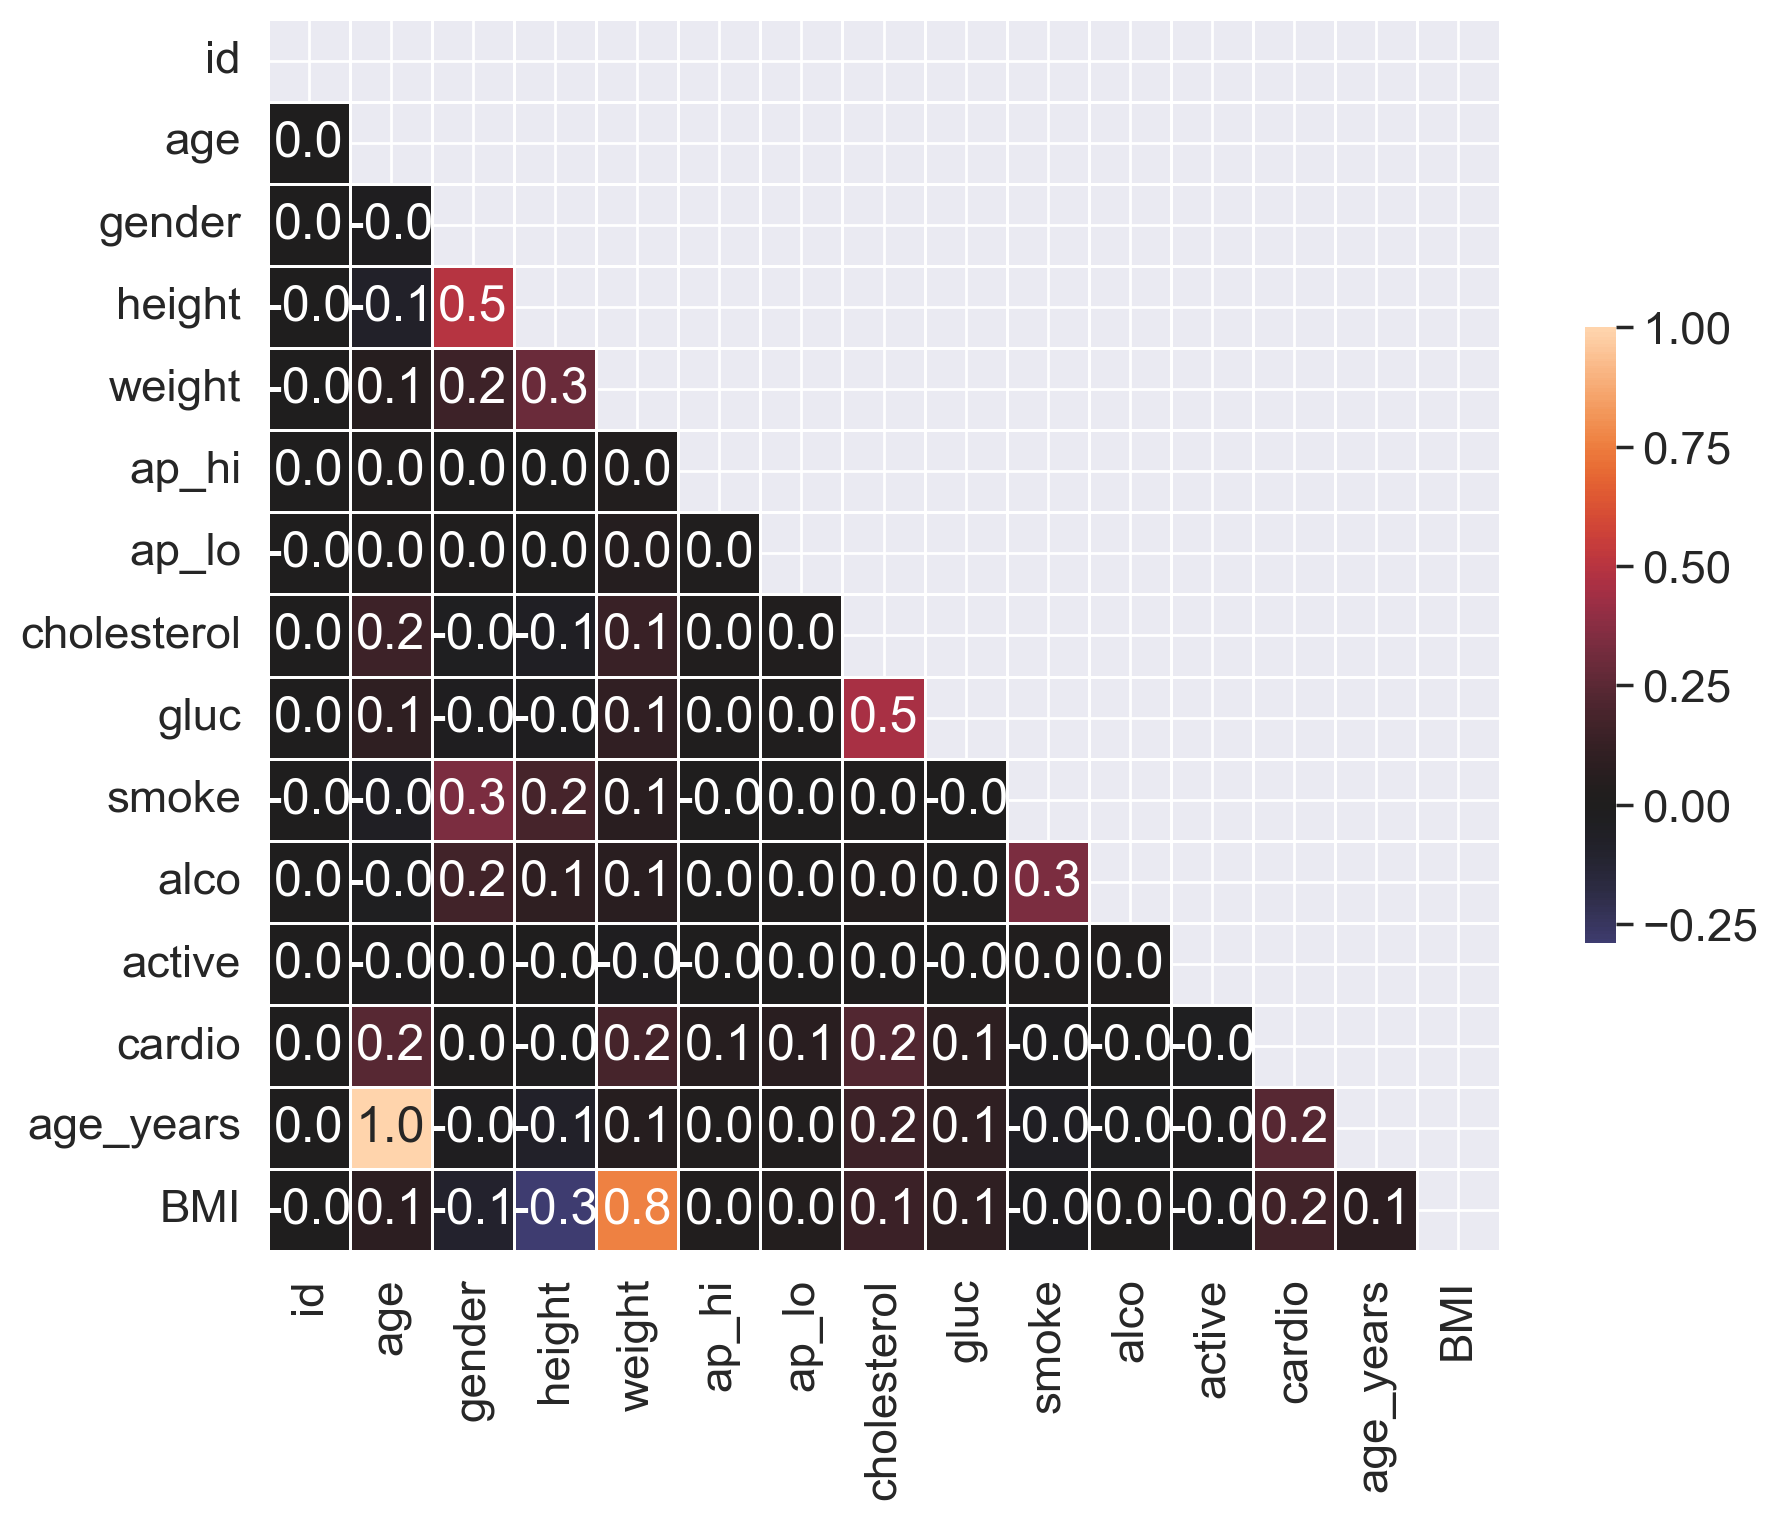

In [28]:
df_corr = filtered_df.corr(method = 'pearson')

mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(
    df_corr,
    mask=mask,
    vmax=1,
    center=0,
    annot=True,
    fmt=".1f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
);

**Answer:** 2. Height, Smoke



## 3.2. Height distribution of men and women

From our exploration of the unique values earlier, we know that the gender is encoded by the values *1* and *2*. Although we do not know the mapping of these values to gender, we can figure that out graphically by looking at the mean values of height and weight for each value of the *gender* feature.

**Task:**

Create a violin plot for the height and gender using `violinplot()`. Use the parameters:
- `hue` to split by gender;
- `scale` to evaluate the number of records for each gender.

In order for the plot to render correctly, we need to convert our `DataFrame` to *long* format using the `melt()` function from `pandas`.

<Axes: xlabel='variable', ylabel='value'>

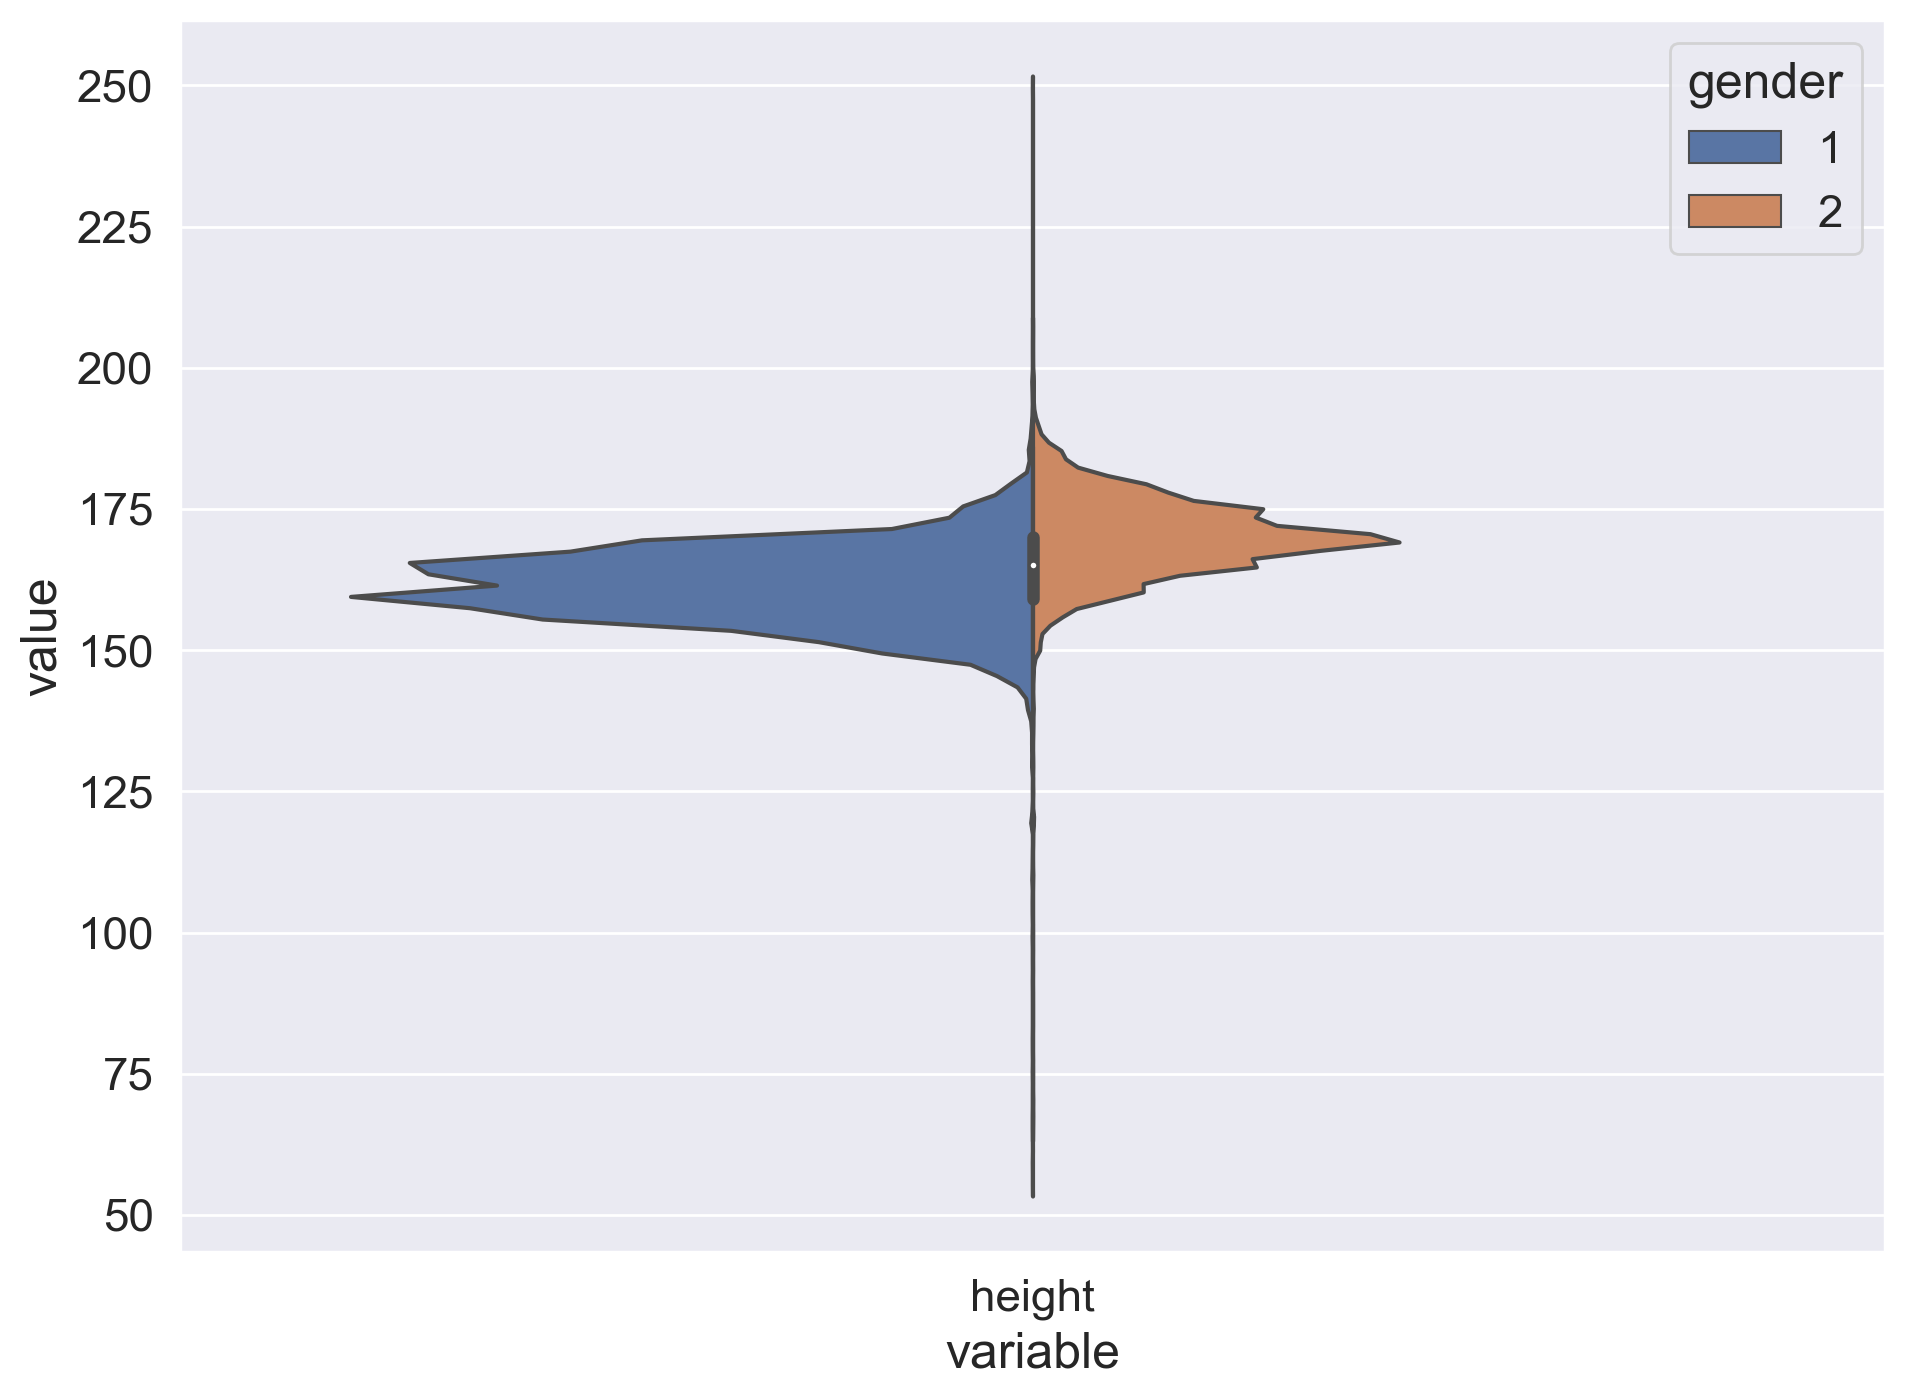

In [29]:
df_long = pd.melt(frame = df, value_vars = ['height'], id_vars = ['gender'])

sns.violinplot(data = df_long, x = 'variable', y = 'value', hue = 'gender', split = 'True', scale = 'count')

## 3.3. Rank correlation

In most cases, *the Pearson coefficient of linear correlation* is more than enough to discover patterns in data.
But let's go a little further and calculate a rank correlation. It will help us to identify such feature pairs in which the lower rank in the variational series of one feature always precedes the higher rank in the another one (and we have the opposite in the case of negative correlation).

**Task:**

Calculate and plot a correlation matrix using the Spearman's rank correlation coefficient.

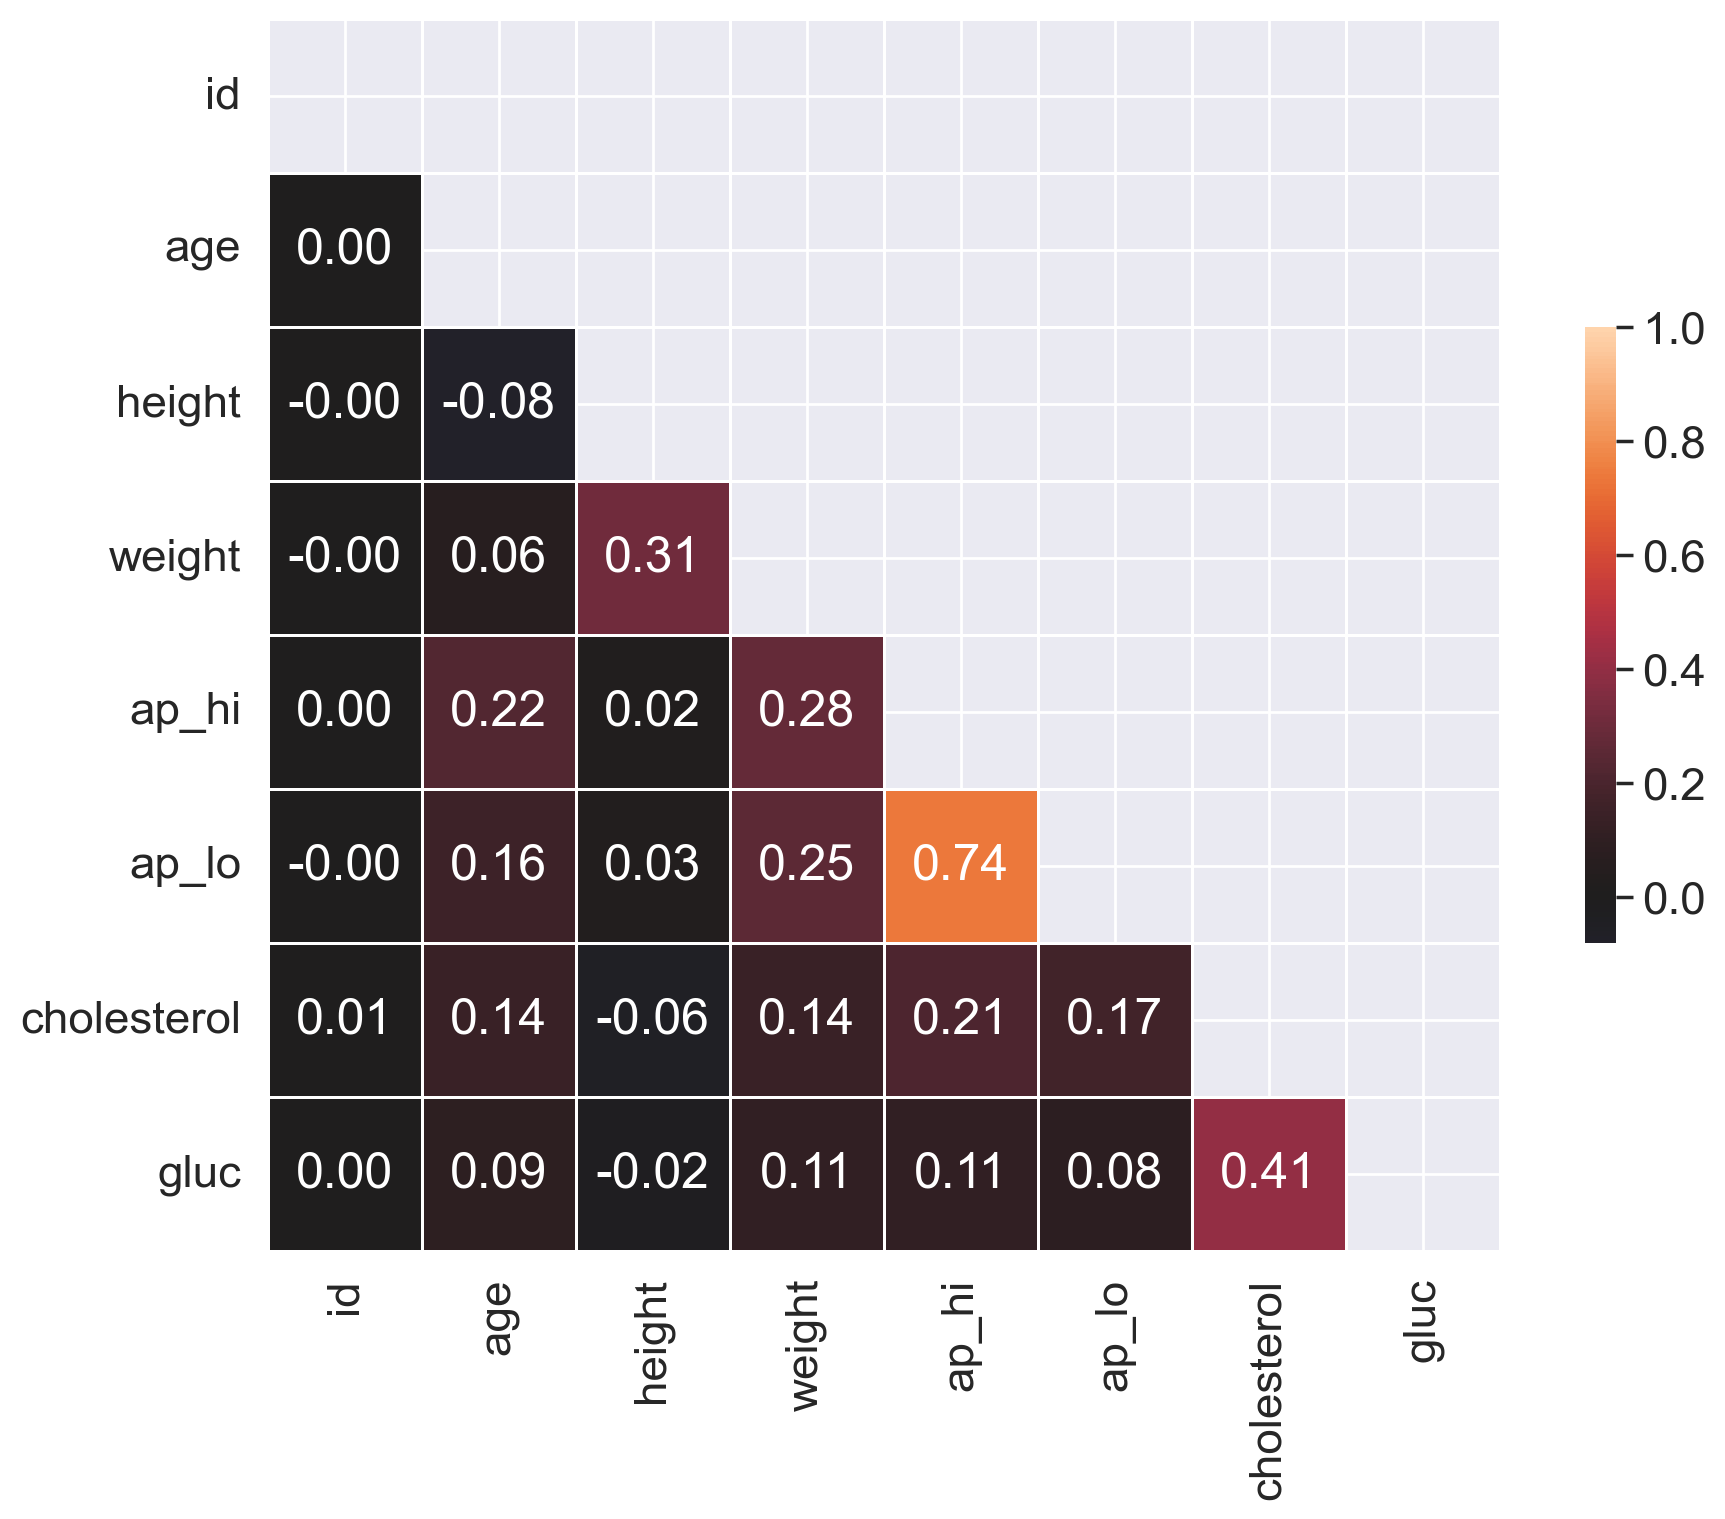

In [30]:
df_corr_Spear = df[
    ['id', 'age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']
].corr(method = 'spearman')

mask = np.zeros_like(df_corr_Spear, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(
    df_corr_Spear,
    mask=mask,
    vmax=1,
    center=0,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
);

**Question:** Which pair of features has the strongest Spearman rank correlation?

**Answer:** Ap_hi, Ap_lo


**Question:** Why do these features have strong rank correlation?

**Answer:** Nature of the data.

## 3.4. Age

Previously, we calculated the age of the respondents in years at the moment of examination.

**Task:**

Create a *count plot* using [`countplot()`](http://seaborn.pydata.org/generated/seaborn.countplot.html) with the age on the *X* axis and the number of people on the *Y* axis. Your resulting plot should have two columns for each age, corresponding to the number of people for each *cardio* class of that age.

<Axes: xlabel='age_years', ylabel='count'>

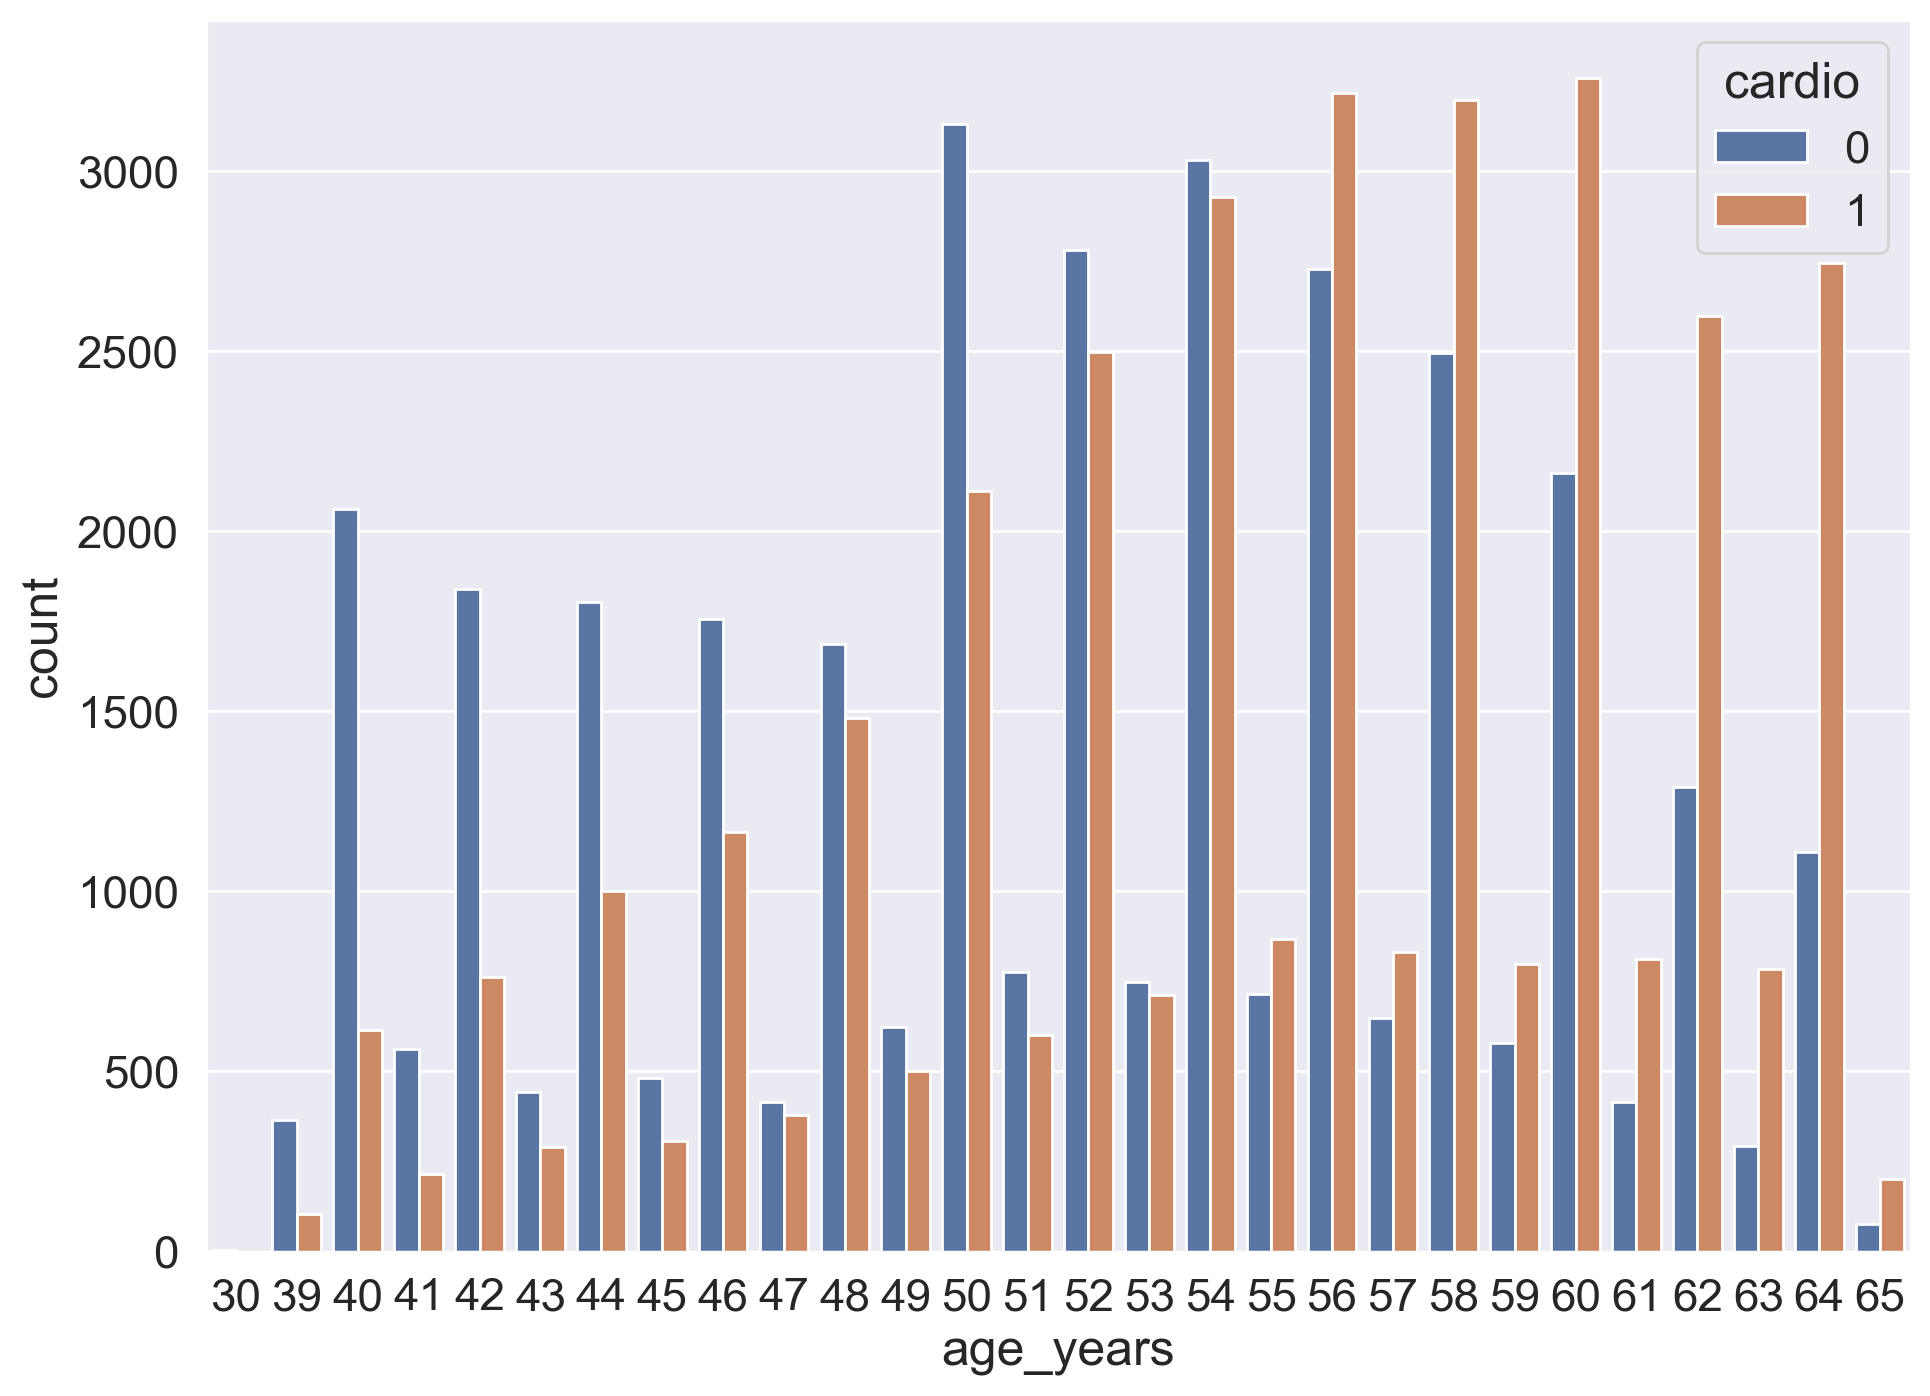

In [31]:
sns.countplot(data = df, x = 'age_years', hue = 'cardio')

**Question 2.4.** What is the smallest age at which the number of people with CVD outnumbers the number of people without CVD?

**Answer:** 55
